# Estudo de Caso: Sistema de Recomendação NetFrixs

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)
n_clients = 200

age = np.random.randint(18, 70, n_clients)

gender = np.random.choice([0, 1], n_clients)

annual_income = np.random.randint(20, 120, n_clients)

spending_score = np.random.randint(1, 100, n_clients)

# Database

In [3]:
df = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Annual Income (k$)': annual_income,
    'Spending Score': spending_score,
})

print(df.head())

   Age  Gender  Annual Income (k$)  Spending Score
0   56       1                  27              12
1   69       1                  46              50
2   46       0                  46              35
3   32       0                 117              33
4   60       1                  40              33


# GMM

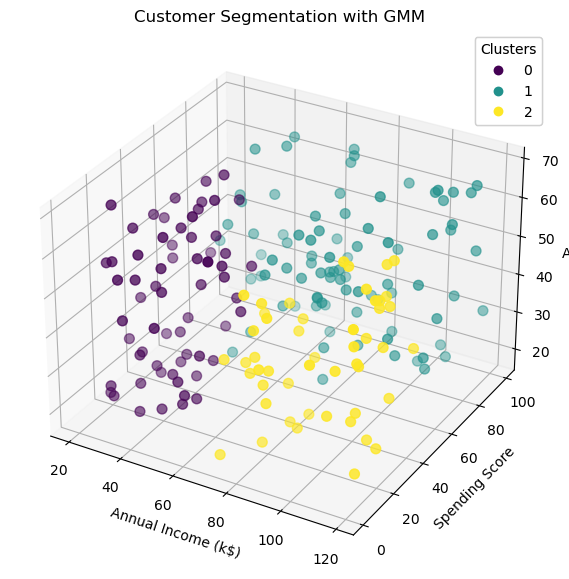

In [4]:
gmm = GaussianMixture(n_components=3, random_state=42)

df['Cluster'] = gmm.fit_predict(df[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score']])

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Annual Income (k$)'],
    df['Spending Score'],
    df['Age'],
    c=df['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')
ax.set_title('Customer Segmentation with GMM')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

# Recommender

In [5]:
movie_recommendations = {
    0: ['Action Movie 1', 'Action Movie 2', 'Action Movie 3'],
    1: ['Comedy Movie 1', 'Comedy Movie 2', 'Comedy Movie 3'],
    2: ['Drama Movie 1', 'Drama Movie 2', 'Drama Movie 3'],
    3: ['Horror Movie 1', 'Horror Movie 2', 'Horror Movie 3'],
    4: ['Romance Movie 1', 'Romance Movie 2', 'Romance Movie 3']
}

df['Movie Recommendations'] = df['Cluster'].map(movie_recommendations)

print(df[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score', 'Cluster', 'Movie Recommendations']].head(10).to_string(index=False))


 Age  Gender  Annual Income (k$)  Spending Score  Cluster                            Movie Recommendations
  56       1                  27              12        0 [Action Movie 1, Action Movie 2, Action Movie 3]
  69       1                  46              50        0 [Action Movie 1, Action Movie 2, Action Movie 3]
  46       0                  46              35        0 [Action Movie 1, Action Movie 2, Action Movie 3]
  32       0                 117              33        2    [Drama Movie 1, Drama Movie 2, Drama Movie 3]
  60       1                  40              33        0 [Action Movie 1, Action Movie 2, Action Movie 3]
  25       0                  49              61        1 [Comedy Movie 1, Comedy Movie 2, Comedy Movie 3]
  38       0                 116              51        2    [Drama Movie 1, Drama Movie 2, Drama Movie 3]
  56       0                  47              43        0 [Action Movie 1, Action Movie 2, Action Movie 3]
  36       1                  83     